# importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
avocado = pd.read_csv(r'D:\sumit_DS project\Datasets with source_code\ML\Avocado_price_predictions/avocado.csv',index_col=0)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#Remove index from dataframe .reset_index(drop)
avocado = avocado.reset_index(drop=True)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#.info() is used to get a concise summary of the DataFrame
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are 3 categorical features and luckily no missing value. Let's explore the data further.

In [5]:
#.shape is used to get the dimensions of the DataFrame
avocado.shape

(18249, 13)

In [6]:
#.describe() is used to view some basic statistical details like percentile, mean, std etc. of a DataFrame
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
#.values attribute return a Numpy representation of the given DataFrame
avocado.values

array([['2015-12-27', 1.33, 64236.62, ..., 'conventional', 2015,
        'Albany'],
       ['2015-12-20', 1.35, 54876.98, ..., 'conventional', 2015,
        'Albany'],
       ['2015-12-13', 0.93, 118220.22, ..., 'conventional', 2015,
        'Albany'],
       ...,
       ['2018-01-21', 1.87, 13766.76, ..., 'organic', 2018,
        'WestTexNewMexico'],
       ['2018-01-14', 1.93, 16205.22, ..., 'organic', 2018,
        'WestTexNewMexico'],
       ['2018-01-07', 1.62, 17489.58, ..., 'organic', 2018,
        'WestTexNewMexico']], dtype=object)

In [8]:
#.columns attribute return a Numpy representation of columns in the DataFrame
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### Appending & Concatenating Series
append(): Series & DataFrame method

Invocation:                 
s1.append(s2)                   
Stacks rows of s2 below s1


concat(): pandas module function                  
Invocation:                  
pd.concat([s1, s2, s3])             
Can stack row-wise or column-wise

In [9]:
even = pd.Series([2,4,6,8,10])
odd = pd.Series([1,3,5,7,9])

res = even.append(odd)
res

0     2
1     4
2     6
3     8
4    10
0     1
1     3
2     5
3     7
4     9
dtype: int64

## Sorting
syntax:

DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind=’quicksort’, na_position=’last’)

In [10]:
# sort values based on "AveragePrice" (ascending) and "year" (descending)
avocado.sort_values(["AveragePrice", "year"], ascending=[True, False]) 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15261,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
7412,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
15473,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
15262,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
1716,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
16055,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
14124,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
17428,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa


## Subsetting
Subsetting is used to get a slice of the original dataframe

In [11]:
# Subsetting columns
avocado["AveragePrice"]

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [12]:
# Subsetting multiple columns
avocado[["AveragePrice","Date"]]

,AveragePrice,Date
0,1.33,2015-12-27
1,1.35,2015-12-20
2,0.93,2015-12-13
3,1.08,2015-12-06
4,1.28,2015-11-29
...,...,...
18244,1.63,2018-02-04
18245,1.71,2018-01-28
18246,1.87,2018-01-21
18247,1.93,2018-01-14


In [13]:
# Subsetting rows
avocado["AveragePrice"]<1

0        False
1        False
2         True
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: AveragePrice, Length: 18249, dtype: bool

In [14]:
# This will print only the rows with price < 1
avocado[avocado["AveragePrice"]<1]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
13,2015-09-27,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.0,conventional,2015,Albany
43,2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,2017-03-05,0.99,155011.12,35367.23,5175.81,5.91,114462.17,95379.07,19083.10,0.0,organic,2017,SouthCentral
17170,2017-02-26,0.99,171145.00,34520.03,6936.39,0.00,129688.58,117252.31,12436.27,0.0,organic,2017,SouthCentral
17536,2017-04-02,0.98,402676.23,34093.33,58330.53,207.85,310044.52,155701.41,154343.11,0.0,organic,2017,West
17537,2017-03-26,0.90,456645.91,36169.35,51398.72,139.55,368938.29,152159.53,216778.76,0.0,organic,2017,West


### Subsetting based on text data

In [15]:
# it will print all the rows with "type" = "organic"
avocado[avocado["type"]=="organic"]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Subsetting based on dates

In [16]:
# it will print all the rows with "Date" <= 2015-02-04
avocado[avocado["Date"]<="2015-02-04"]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
47,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
48,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,2015-02-01,1.77,7210.19,1634.42,3012.44,0.00,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,2015-01-25,1.63,7324.06,1934.46,3032.72,0.00,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,2015-01-18,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


### Subsetting based on multiple conditions
#### SEPERATE EACH CONDITION WITH PARENTHESES TO AVOID ERRORS

In [17]:
# it will print all the rows with "Date" before 2015-02-04 and "type" == "organic"
avocado[(avocado["Date"]<"2015-02-04") & (avocado["type"]=="organic")]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9173,2015-02-01,1.83,1228.51,33.12,99.36,0.0,1096.03,1096.03,0.00,0.0,organic,2015,Albany
9174,2015-01-25,1.89,1115.89,14.87,148.72,0.0,952.30,952.30,0.00,0.0,organic,2015,Albany
9175,2015-01-18,1.93,1118.47,8.02,178.78,0.0,931.67,931.67,0.00,0.0,organic,2015,Albany
9176,2015-01-11,1.77,1182.56,39.00,305.12,0.0,838.44,838.44,0.00,0.0,organic,2015,Albany
9177,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,2015-02-01,1.77,7210.19,1634.42,3012.44,0.0,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,2015-01-25,1.63,7324.06,1934.46,3032.72,0.0,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,2015-01-18,1.71,5508.20,1793.64,2078.72,0.0,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,2015-01-11,1.69,6861.73,1822.28,2377.54,0.0,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


### Subsetting using .isin()
isin() method helps in selecting rows with having a particular(or Multiple) value in a particular column

In [18]:
# subset the avocado in the region Boston or SanDiego
regionFilter = avocado["region"].isin(["Boston", "SanDiego"])
avocado[regionFilter]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
208,2015-12-27,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.0,conventional,2015,Boston
209,2015-12-20,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,2015,Boston
210,2015-12-13,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,2015,Boston
211,2015-12-06,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,2015,Boston
212,2015-11-29,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,2018-02-04,1.81,17454.74,1158.41,7388.27,0.00,8908.06,8908.06,0.00,0.0,organic,2018,SanDiego
18101,2018-01-28,1.91,17579.47,1145.64,8284.41,0.00,8149.42,8149.42,0.00,0.0,organic,2018,SanDiego
18102,2018-01-21,1.95,18676.37,1088.49,9282.37,0.00,8305.51,8305.51,0.00,0.0,organic,2018,SanDiego
18103,2018-01-14,1.81,21770.02,3285.98,14338.52,0.00,4145.52,4145.52,0.00,0.0,organic,2018,SanDiego


### Multiple parameter Filtering
Use logical operators to combine different filters

In [19]:
# subset the avocado in the region Boston or SanDiego in the year 2016 or 2017
regionFilter = avocado["region"].isin(["Boston", "SanDiego"])
yearFilter = avocado["year"].isin(["2016", "2017"])
avocado[regionFilter & yearFilter]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


### Detecting missing values .isna()
.isna() is a method used to find is there exist any NaN values in the DataFrame

It will give a True bool value if a cell has a NaN value

In [20]:
avocado.isna()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False


#### We can use .any() function to get a consise info

In [40]:
avocado.isna().any()

Date                  False
AveragePrice          False
Total Volume          False
4046                  False
4225                  False
4770                  False
Total Bags            False
Small Bags            False
Large Bags            False
XLarge Bags           False
type                  False
year                  False
region                False
AveragePricePer100    False
dtype: bool

### Counting missing values

In [21]:
avocado.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Imputing missing values¶
1. Drop NaN using = df.dropna()          
2. Fill NaN with value  = x .fillna(x)

In [22]:
# Luckily we don't have any NaN but if we have we can use any of the two methods
# 1. removing missing values
avocado.dropna()

# ****  OR  ****
# 2. imputing missing values with mean
meanVal = avocado["AveragePrice"].mean()
avocado.fillna(meanVal)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Adding a new column¶
It can easily be done using the [ ] brackets

Lets add a new column to our dataframe called AveragePricePer100

In [23]:
avocado["AveragePricePer100"] = avocado["AveragePrice"] * 100
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,163.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,171.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,187.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,193.0


### Deleting columns in DataFrame .drop(lst,axis = 1)

dataFrame.drop(['COLUMN_NAME'], axis = 1)

1.the first parameter is a list of columns to be deleted      
2.axis = 1 means delete column        
3.axis = 0 means delete row

In [24]:
avocado.drop(["AveragePricePer100"],axis = 1)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Summary statistics           
Some of the functions availabe in pandas are:

.median() .mode() .min() .max() .var() .std() .sum() .quantile()

In [25]:
# mean of the AveragePrice of avocado
avocado["AveragePrice"].mean()

1.4059784097758825

### Summarizing dates           
To find the min or max date in a dataframe

In [26]:
avocado["Date"].max()

'2018-03-25'

### .agg() method         
Pandas Series.agg() is used to pass a function or list of function to be applied on a series or even each element of series separately.

Syntax: Series.agg(func, axis=0)

Parameters: func: Function, list of function or string of function name to be called on Series. axis:0 or ‘index’ for row wise operation and 1 or ‘columns’ for column wise operation.

Return Type: The return type depends on return type of function passed as parameter.

In [27]:
def pct30(column):     
    #return the 0.3 quartile
    return column.quantile(0.3)
def pct50(column):     
    #return the 0.5 quartile
    return column.quantile(0.5)

avocado[["AveragePrice","Total Bags"]].agg([pct30,pct50])

,AveragePrice,Total Bags
pct30,1.15,7316.634
pct50,1.37,39743.830


###  Dropping duplicate names .drop_duplicates(lst)
Delete all the duplicate names from the dataframe

In [28]:
temp = avocado.drop_duplicates(subset=["year"])
temp

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,133.0
2808,2016-12-25,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,2.94,conventional,2016,Albany,152.0
5616,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.00,conventional,2017,Albany,147.0
8478,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany,157.0


### Count categorical data .value_counts()           
Pandas Series.value_counts() function return a Series containing counts of unique values

Syntax: Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Parameter : normalize : If True then the object returned will contain the relative frequencies of the unique values. sort : Sort by values. ascending : Sort in ascending order. bins : Rather than count values, group them into half-open bins, a convenience for pd.cut, only works with numeric data. dropna : Don’t include counts of NaN.

Returns : counts : Series

In [29]:
# count number of avocado in each year in descending order
avocado["year"].value_counts(sort=True, ascending = False)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

### Grouped summaries .groupby(col)                
This function will group similar categories into one and then we can perform some summary statistics

Syntax: DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

Parameters : by : mapping, function, str, or iterable
axis : int, default 0              
level : If the axis is a MultiIndex (hierarchical), group by a particular level or levels                 
as_index : For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output      
sort : Sort group keys. Get better performance by turning this off. Note this does not influence the order of observations within each group. groupby preserves the order of rows within each group.             
group_keys : When calling apply, add group keys to index to identify pieces               
squeeze : Reduce the dimensionality of the return type if possible, otherwise return a consistent type

Returns : GroupBy object

In [30]:
# group by multiple columns and perform multiple summary statistic operations
avocado.groupby(["year","type"])["AveragePrice"].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

### Pivot table
A pivot table is a table of statistics that summarizes the data of a more extensive table.

IMPORRANT parements to remember are
"index": it is the value that appeares on the left most side of the table (it can be a list)                                                       
"columns": these are the column you want to add to the pivot table                                                        
"aggfunc": it will call the function (it can be a list)        
"values": it is the attribute which will be summarized in the table (values inside the table)

In [31]:
# this is the same table we build in the previous cell but using pivot table
avocado.pivot_table(index=["year","type"], aggfunc=[min,max,np.mean,np.median], values="AveragePrice")

min          max         mean       median
                  AveragePrice AveragePrice AveragePrice AveragePrice
year type                                                            
2015 conventional         0.49         1.59     1.077963         1.08
     organic              0.81         2.79     1.673324         1.67
2016 conventional         0.51         2.20     1.105595         1.08
     organic              0.58         3.25     1.571684         1.53
2017 conventional         0.46         2.22     1.294888         1.30
     organic              0.44         3.17     1.735521         1.72
2018 conventional         0.56         1.74     1.127886         1.14
     organic              1.01         2.30     1.567176         1.55

## Explicit indexes
Indexes make subsetting simpler using .loc and .iloc

#### Setting column as the index

In [32]:
regionIndex = avocado.set_index(["region"])
regionIndex

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AveragePricePer100
region,,,,,,,,,,,,,
Albany,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,133.0
Albany,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,135.0
Albany,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,93.0
Albany,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,108.0
Albany,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,163.0
WestTexNewMexico,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,171.0
WestTexNewMexico,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,187.0


In [33]:
# Insted of doing this
avocado[avocado["region"].isin(["Albany", "WestTexNewMexico"])]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePer100
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,133.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,135.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,93.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,108.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,163.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,171.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,187.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,193.0


In [34]:
# we can simply do
regionIndex.loc[["Albany", "WestTexNewMexico"]]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AveragePricePer100
region,,,,,,,,,,,,,
Albany,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,133.0
Albany,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,135.0
Albany,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,93.0
Albany,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,108.0
Albany,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestTexNewMexico,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,163.0
WestTexNewMexico,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,171.0
WestTexNewMexico,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,187.0


## Visualizing your data

### Histograms
use the function .hist()

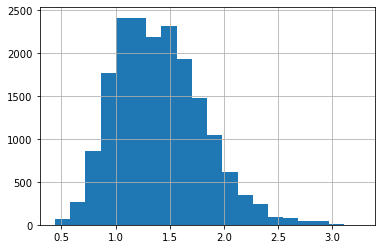

In [35]:
avocado["AveragePrice"].hist(bins=20)
plt.show()

### Bar plots

In [36]:
regionFilter = avocado.groupby("region")["AveragePrice"].mean().head(10)
regionFilter

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Name: AveragePrice, dtype: float64

<AxesSubplot:title={'center':'Average price in 10 regions'}, xlabel='region'>

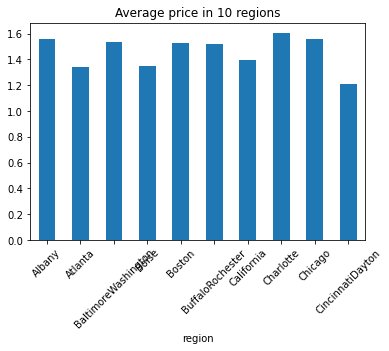

In [37]:
regionFilter.plot(kind = "bar",rot=45,title="Average price in 10 regions")

### Scatter plot

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

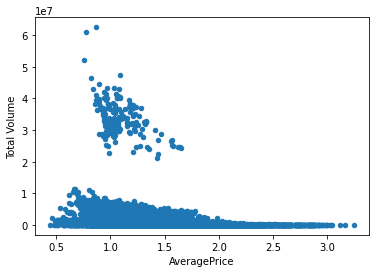

In [38]:
avocado.plot(x="AveragePrice", y="Total Volume", kind="scatter")

## Arithmetic with Series & DataFrames
You can use arithmetic operators directly on series but sometimes you need more control while performing these operations, here is where these explicit arithmetic functions come into the picture

Add/Subtract function (just replece add with sub)

In [39]:
# subtract AveragePrice with AveragePrice :P
# Dah its 0
avocado["AveragePrice"].sub(avocado["AveragePrice"])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18244    0.0
18245    0.0
18246    0.0
18247    0.0
18248    0.0
Name: AveragePrice, Length: 18249, dtype: float64

## Merge DataFrames
Syntax:

DataFrame.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) → 'DataFrame'[source]¶ Merge DataFrame or named Series objects with a database-style join.

### Join
DataFrame.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) → 'DataFrame'[source]¶ Merge DataFrame or named Series objects with a database-style join.